### Table of contents
[Predefined functions](#funcs)

[Parameters, filenames and directories](#params)

[Reading maps](#readMaps)

[Visualizing maps](#visual)

In [17]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from func_visualizations import plotSOM, plotSOMRow
from func_maps import readMaps
from os.path import join
from os import mkdir

### Parameters, filenames and directories
<a id='params'>#params<a>

In [18]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex023_Euclid'
dirMaps='maps'
dirPlots='plots'
#mkdir(join(dirSOM,nameOfExperiment,dirPlots))
mapsAllKeys=['mapsTrainOnTrain','mapsTestOnTrain','mapsDeimosOnTrain','mapsRunOnTrain',
             'mapsTrainOnRun','mapsTestOnRun','mapsDeimosOnRun','mapsRunOnRun',
             'mapsTrainOnRunBig','mapsTestOnRunBig','mapsDeimosOnRunBig','mapsRunOnRunBig']

In [19]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'

In [20]:
### Format for saving images ###
imSaveFormat='.png'
#imSaveFormat='.eps'

### Reading maps
<a id='readMaps'>#readMaps<a>

In [21]:
mapsAll={}
for m in mapsAllKeys:
    mapsAll[m]=readMaps(join(dirSOM,nameOfExperiment,dirMaps),m)

### Visualizing maps
<a id='visual'>#visual<a>

Text(0.45, 0.91, 'mapsTrainOnTrain')

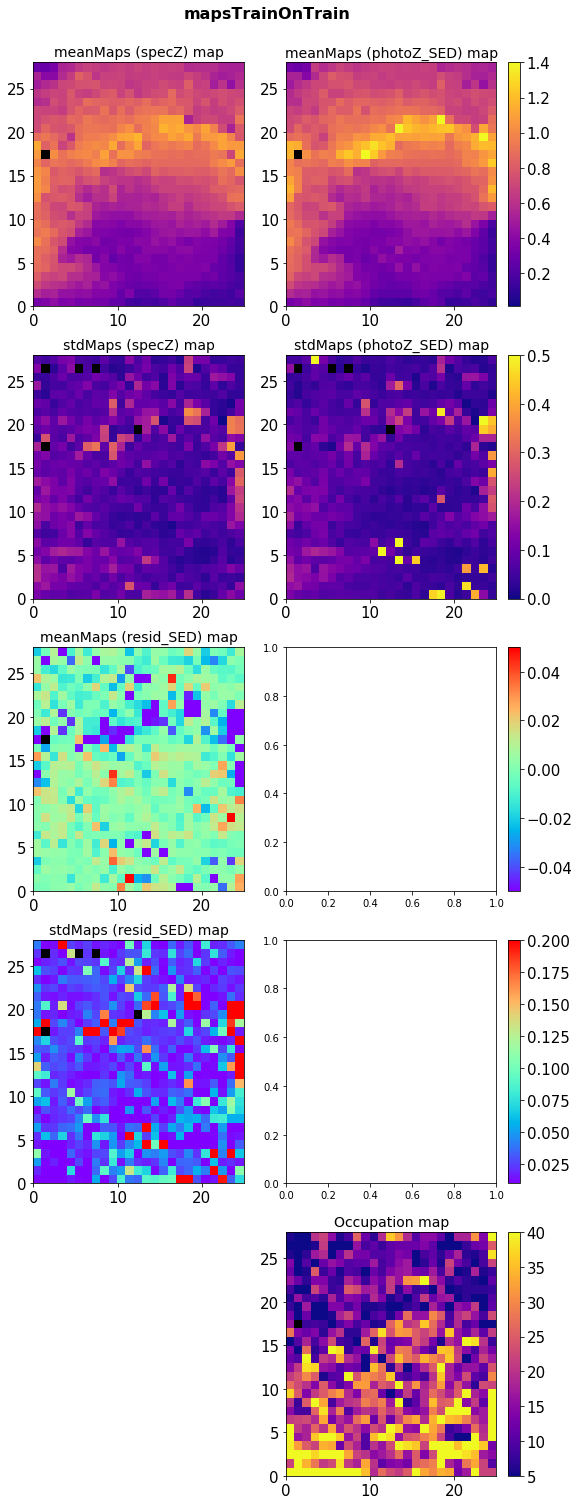

In [33]:
### Plotting all the maps for Train or Deimos datasets. ###
mapKey='mapsTrainOnTrain'

rows=5
cases=[specZ,photoZ_SED]
fig, axes = plt.subplots(rows,len(cases),figsize=(10,26))
cbFlag=False
mapsDict=mapsAll[mapKey]
h,w=mapsDict['stdMaps'][photoZ_SED].shape[0],mapsDict['stdMaps'][photoZ_SED].shape[1]
estimators=['meanMaps','stdMaps']

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=0,height=h, width=w,
           cmap='plasma',vmin=0.01, vmax=1.4,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=1,height=h, width=w,
           cmap='plasma',vmin=0, vmax=0.5,badVal=0,cbFlag=cbFlag,fig=fig)

cases=[residSED]

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=2,height=h, width=w,
           cmap='rainbow',vmin=-0.05, vmax=0.05,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=3,height=h, width=w,
           cmap='rainbow',vmin=0.01, vmax=0.2,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimator='activMap',axes=axes, row=4,height=h, width=w,
           cmap='plasma',vmin=5, vmax=40,badVal=0,cbFlag=cbFlag,axisToPlot=1,fig=fig)

axes[4][1].set_title('Occupation map',fontsize=14)

fig.suptitle(mapKey,x=0.45,y=0.91,size=16,weight='bold')

In [34]:
fig.savefig(join(dirSOM,nameOfExperiment,dirPlots,mapKey+imSaveFormat))

Text(0.45, 0.92, 'mapsRunOnRunBig')

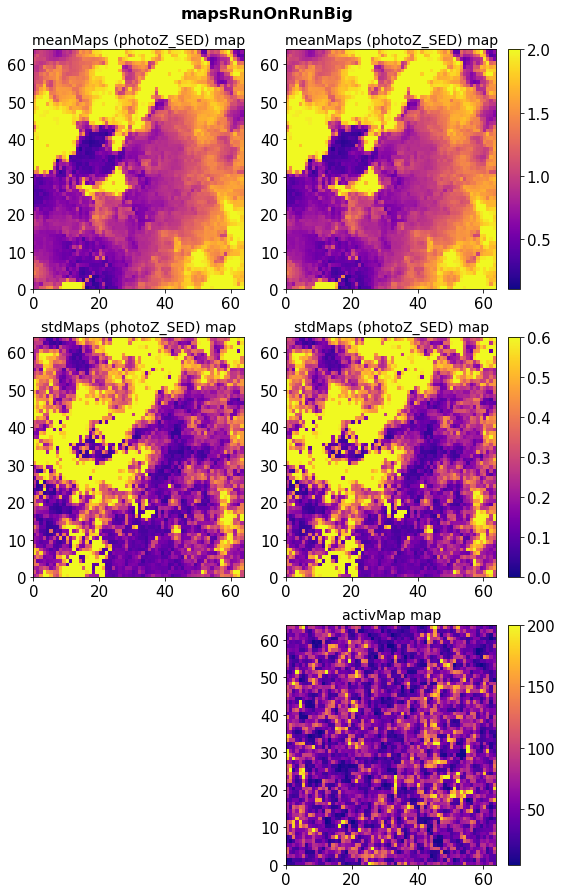

In [35]:
### Plotting all the maps for Run dataset. ###
mapKey='mapsRunOnRunBig'

rows=3
cases=[photoZ_SED,photoZ_SED]
fig, axes = plt.subplots(rows,len(cases),figsize=(5*len(cases),5*rows))

cbFlag=False
mapsDict=mapsAll[mapKey]
h,w=mapsDict['stdMaps'][photoZ_SED].shape[0],mapsDict['stdMaps'][photoZ_SED].shape[1]
estimators=['meanMaps','stdMaps']

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=0,height=h, width=w,
           cmap='plasma',vmin=0.1, vmax=2,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=1,height=h, width=w,
           cmap='plasma',vmin=0, vmax=0.6,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimator='activMap',axes=axes, row=2,height=h, width=w,
           cmap='plasma',vmin=5, vmax=200,badVal=0,cbFlag=cbFlag,axisToPlot=1,fig=fig)

fig.suptitle(mapKey,x=0.45,y=0.92,size=16,weight='bold')

In [36]:
fig.savefig(join(dirSOM,nameOfExperiment,dirPlots,mapKey+imSaveFormat))

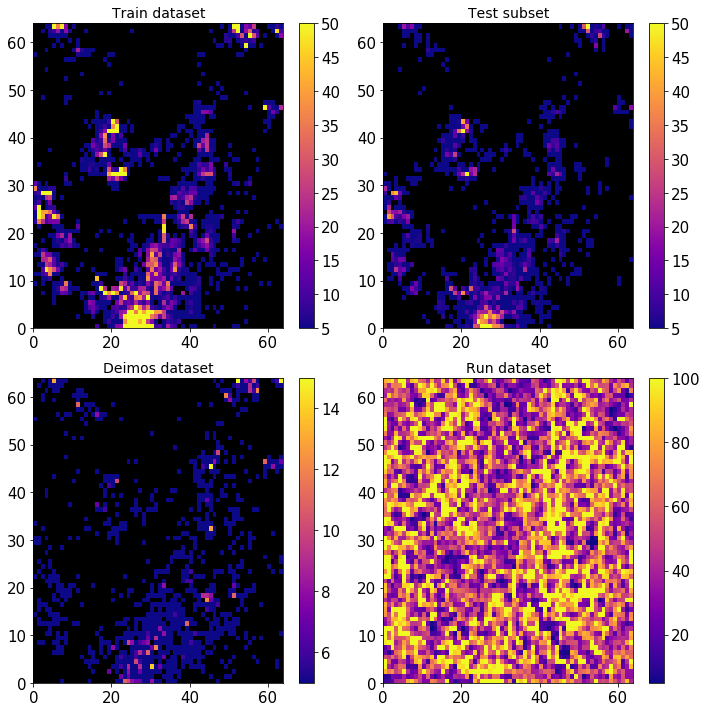

In [37]:
mapKey='ActivMaps'
fig, axs=plt.subplots(2,2,figsize=(10,10))
mapToPlot=mapsAll['mapsTrainOnRunBig']['activMap']
title='Train dataset'
plotSOM(mapToPlot,height=h, width=w,title=title,saveFlag=False,saveName='',axs=axs[0][0],cmap='plasma',
            vmin=5,vmax=50,badVal=0,under=False,cb=True)

title='Test subset'
mapToPlot=mapsAll['mapsTestOnRunBig']['activMap']
plotSOM(mapToPlot,height=h, width=w,title=title,saveFlag=False,saveName='',axs=axs[0][1],cmap='plasma',
            vmin=5,vmax=50,badVal=0,under=False,cb=True)

title='Deimos dataset'
mapToPlot=mapsAll['mapsDeimosOnRunBig']['activMap']
plotSOM(mapToPlot,height=h, width=w,title=title,saveFlag=False,saveName='',axs=axs[1][0],cmap='plasma',
            vmin=5,vmax=15,badVal=0,under=False,cb=True)

title='Run dataset'
mapToPlot=mapsAll['mapsRunOnRunBig']['activMap']
plotSOM(mapToPlot,height=h, width=w,title=title,saveFlag=False,saveName='',axs=axs[1][1],cmap='plasma',
            vmin=5,vmax=100,badVal=0,under=False,cb=True)
plt.tight_layout()

In [38]:
fig.savefig(join(dirSOM,nameOfExperiment,dirPlots,mapKey+imSaveFormat))